In [1]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Predictive, Trace_ELBO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rethinking import MAP, precis

In [2]:
#m = Binomial(100, torch.tensor([0 , .2, .8, 1]))

data = np.concatenate((np.ones(13, dtype=int), np.zeros(8,dtype=int)))
train = torch.tensor(data, dtype=torch.int)


def model(w):
    p = pyro.sample("p", dist.Normal(0.5, 0.1)) # gaussian prior
    pyro.sample("w", dist.Binomial(21,p), obs=w) # binomial likelihood
    


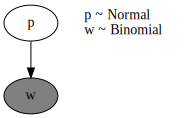

In [3]:

pyro.render_model(model, model_args=torch.tensor([13]), render_distributions=True, filename="modelAccuracyPlates.png")


In [4]:
#6 heads in 9 tosses with a fair coin
#dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()
dist.Binomial(total_count=21, probs=0.5).log_prob(torch.tensor(13.)).exp()


tensor(0.0970)

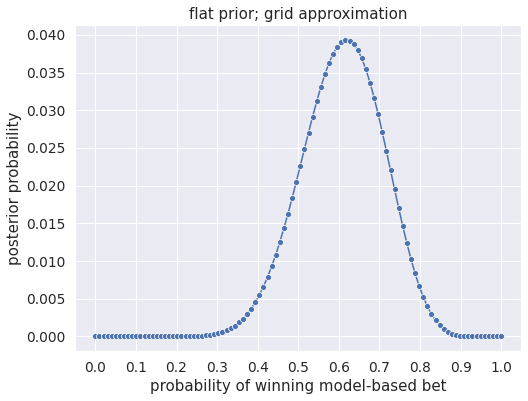

In [5]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=100)

# define prior
prior = torch.tensor(1.).repeat(100)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=21,
                           probs=p_grid).log_prob(torch.tensor(13.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

ax = sns.lineplot(p_grid, posterior, marker="o")
plt.xticks(np.linspace(0,1,11))
ax.set(xlabel="probability of winning model-based bet", ylabel="posterior probability",
       title="flat prior; grid approximation");
plt.savefig('figs/'+"flatPrior13W8Lgrid.png")
#see all the wasted effort in the sampling 

In [14]:
t = 0.6
def thetaGreaterThan(t,x,posterior):
    s = 0.0
    c = 0.0
    for (theta,post) in zip(x,posterior):
        c = c + theta
        if theta > t :
            s = s + post
    prob_GreatThan_t = s/theta
    return(prob_GreatThan_t)

a = thetaGreaterThan(0.6,p_grid,posterior)
a

tensor(0.5421)

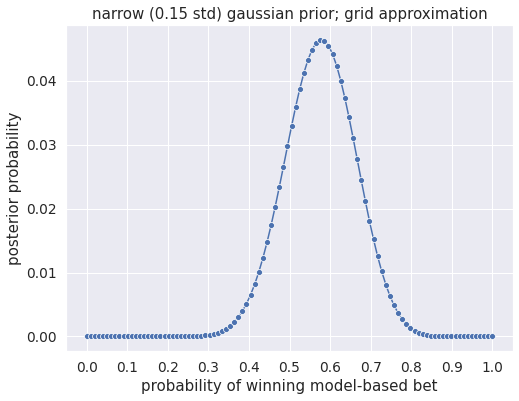

In [15]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=100)

# define prior
#prior = torch.tensor(1.).repeat(100)
prior = dist.Normal(0.5, 0.15).log_prob(p_grid).exp()

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=21,
                           probs=p_grid).log_prob(torch.tensor(13.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

ax = sns.lineplot(p_grid, posterior, marker="o")
plt.xticks(np.linspace(0,1,11))
ax.set(xlabel="probability of winning model-based bet", ylabel="posterior probability",
       title="narrow (0.15 std) gaussian prior; grid approximation");
plt.savefig('figs/'+"GaussianPoint15Prior13W8Lgrid.png")

In [16]:
b = thetaGreaterThan(0.6,p_grid,posterior)
b

tensor(0.3900)

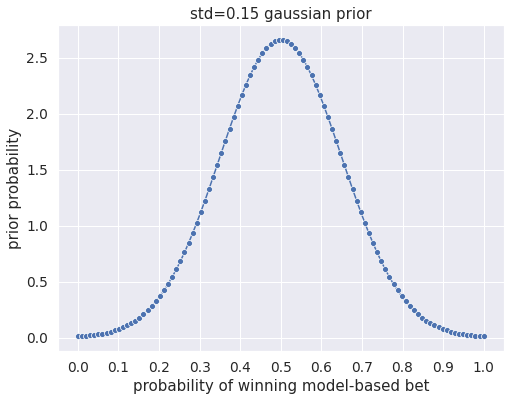

In [45]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=100)

# define prior
mu = 0.5
sigma = 0.15
prior = dist.Normal(mu, sigma).log_prob(p_grid).exp()

ax = sns.lineplot(p_grid, prior, marker="o")
plt.xticks(np.linspace(0,1,11))
ax.set(xlabel="probability of winning model-based bet", ylabel="prior probability",
       title="std="+ str(sigma) + " gaussian prior");
plt.savefig('figs/'+"stdPoint15Gaussian.png")

In [9]:
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
prior = (-5 * (p_grid - 0.5).abs()).exp()

In [23]:
def model(w):
    #dist.Uniform(0, 1) vs. dist.Normal(0.5, 0.1)
    p = pyro.sample("p", dist.Uniform(0,1))  # uniform prior
    pyro.sample("w", dist.Binomial(21, p), obs=w)  # binomial likelihood

globe_qa = MAP(model).run(torch.tensor(13.))

# display summary of quadratic approximation
precis(globe_qa)

,Mean,StdDev,|0.89,0.89|
p,0.56,0.1,0.4,0.72


In [19]:
def model2(w):
    #dist.Uniform(0, 1) vs. dist.Normal(0.5, 0.1)
    p = pyro.sample("p", dist.Normal(0.5, 0.1))  # uniform prior
    pyro.sample("w", dist.Binomial(21, p), obs=w)  # binomial likelihood

globe_qa2 = MAP(model2).run(torch.tensor(13.))

# display summary of quadratic approximation
precis(globe_qa2)

,Mean,StdDev,|0.89,0.89|
p,0.48,0.07,0.36,0.6


([<matplotlib.axis.XTick at 0x7f52f965ed30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

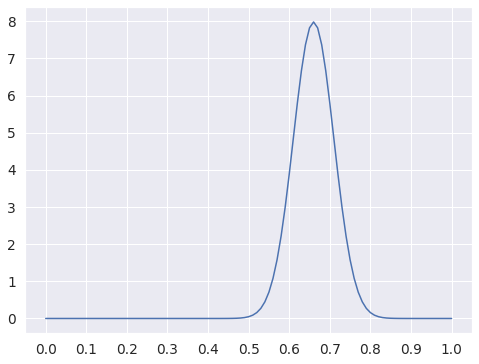

In [20]:
# analytical calculation
w = 13
n = 21
x = torch.linspace(0, 1, 101)
ax.set(xlabel="proportion win", ylabel="Density", title="n = 21")
# quadratic approximation
precis_df = precis(globe_qa)
sns.lineplot(x, dist.Normal(precis_df["Mean"][0],
                            precis_df["StdDev"][0]).log_prob(x).exp())
plt.xticks(np.linspace(0,1,11))

In [22]:
foo = torch.tensor(6.)
foo

tensor(6.)

In [23]:
foo/2

tensor(3.)

In [36]:
mu = 0.5
str(mu)

'0.5'